<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/pandas_course/13_comparison_to_SQL/11_comparison_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obróbka danych**

In [2]:
import numpy as np
import pandas as pd


url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/'
       'Online%20Retail.xlsx')

# sprzedaż
retail = pd.read_excel(url)

In [3]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
desc = retail.describe()
desc

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
cols = [col for col in retail.columns]
cols

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [7]:
# %% preprocessing
# drop rows with null (usuwa wiersze w których kolumna CustomerID ma puste wartości)
retail = retail[retail['CustomerID'].notnull()]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
# convert type to string
retail['CustomerID'] = retail['CustomerID'].apply(lambda x: str(int(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
# exclude Quantity less than zero
retail = retail[retail['Quantity'] >= 0]

# **Porównanie do SQL**

In [12]:
# wszystkie kolumny
"""
SELECT *
FROM retail;
"""
query = retail
query

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [13]:
# wybór trzech kolumn
"""
SELECT Quantity, UnitPrice, CustomerID
FROM retail;
"""
query = retail[['Quantity', 'UnitPrice', 'CustomerID']]

In [15]:
# wybór trzech kolumn i 10 pierwszych wierszy
"""
SELECT Quantity, UnitPrice, CustomerID
FROM retial
LIMIT 10;
"""
query = retail[['Quantity', 'UnitPrice', 'CustomerID']][:10]
# można też tak
query_ = retail[['Quantity', 'UnitPrice', 'CustomerID']].head(10)
query

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [17]:
# wyybór zakupów konkretnego klienta
"""
SELECT *
FROM retial
WHERE CustomerID='17850';
"""
query = retail[retail['CustomerID'] == '17850']
# można też tak
query_ = retail.query('CustomerID == "17850"')
query_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
4540,536790,22752,SET 7 BABUSHKA NESTING BOXES,4,2010-12-02 15:26:00,7.65,17850,United Kingdom
4541,536790,22803,IVORY EMBROIDERED QUILT,3,2010-12-02 15:26:00,35.75,17850,United Kingdom
4542,536790,21730,GLASS STAR FROSTED T-LIGHT HOLDER,12,2010-12-02 15:26:00,4.25,17850,United Kingdom
4543,536791,22632,HAND WARMER RED POLKA DOT,12,2010-12-02 15:27:00,1.85,17850,United Kingdom


In [ ]:
# and
"""
SELECT *
FROM retial
WHERE CustomerID='17850' and UnitPrice > 5;
"""

query = retail[(retail['CustomerID'] == '17850') & (retail['UnitPrice'] > 5)]
# można też tak
query_ = retail.query('CustomerID == "17850" and UnitPrice > 5')
query

In [19]:
# or
"""
SELECT *
FROM retial
WHERE CustomerID='17850' or Country='France';
"""

query = retail[(retail['CustomerID'] == '17850') | (retail['Country'] == 'France')]
# można też tak
query_ = retail.query('CustomerID == "17850" or Country == "France"')

In [20]:
# isnull
"""
SELECT *
FROM retail
WHERE InvoiceNo is null;
"""
retail[retail['InvoiceNo'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# is not null
"""
SELECT *
FROM retail
WHERE InvoiceNo is not null;
"""
retail[retail['InvoiceNo'].notnull()]

In [26]:
# group by (ile zamówień jest dla każdego klienta)
"""
SELECT CustomerID, count(*)
FROM retial
GROUP BY CustomerID;
"""
cust_id = retail.groupby('CustomerID').size()
print("Uporządkowane po numerze CustomerID")
print(cust_id)
print()
print("Można też tak. Uporządkowane po ilości wystąpień CustomerID")
moje_cust_id = retail["CustomerID"].value_counts()
print(moje_cust_id)

Uporządkowane po numerze CustomerID
CustomerID
12346      1
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     12
18283    756
18287     70
Length: 4339, dtype: int64

Można też tak. Uporządkowane po ilości wystąpień CustomerID
17841    7847
14911    5677
14096    5111
12748    4596
14606    2700
         ... 
15657       1
16073       1
13307       1
15118       1
17715       1
Name: CustomerID, Length: 4339, dtype: int64


In [27]:
# %% compute new cols (nowa kolumna Revenue, w której jest całkowita wartość zamówienia)
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# group by
"""
SELECT CustomerID, avg(Revenue), count(*)
FROM retial
GROUP BY CustomerID;
"""
revenue_by_cust_id = retail.groupby('CustomerID').aggregate({'Revenue': np.mean,
                                                            'CustomerID': np.size}).rename(columns={'Revenue': 'AverageRevenue',
                                                                                                    'CustomerID': 'Count CustomerID'})
print(revenue_by_cust_id)

print()
print("Moje. Używając agg")
moje_revenue_by_cust_id = retail.groupby('CustomerID').agg(AverageRevenue=('Revenue', 'mean'),
                                                           CountCustomerID=('Revenue', 'size'))
print(moje_revenue_by_cust_id)

            AverageRevenue  Count CustomerID
CustomerID                                  
12346         77183.600000                 1
12347            23.681319               182
12348            57.975484                31
12349            24.076027                73
12350            19.670588                17
...                    ...               ...
18280            18.060000                10
18281            11.545714                 7
18282            14.837500                12
18283             2.771005               756
18287            26.246857                70

[4339 rows x 2 columns]

Moje 
            AverageRevenue  CountCustomerID
CustomerID                                 
12346         77183.600000                1
12347            23.681319              182
12348            57.975484               31
12349            24.076027               73
12350            19.670588               17
...                    ...              ...
18280            18.060000     

In [34]:
# z daty wystawienia faktury pobiera dzień
# Można używać datetime as dt, bo typem kolumny InvoiceDateDay jest datetime64[ns]
retail['InvoiceDateDay'] = retail['InvoiceDate'].dt.day
print(retail["InvoiceDate"])
print()
print(retail["InvoiceDateDay"])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: InvoiceDateDay, Length: 397924, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
print("Suma wartości na fakturach dla każdego dnia miesiąca")
query = retail.groupby('InvoiceDateDay').aggregate({'Revenue': np.sum})
print(query)
print(type(query))
print(query.index)
print()
print("Moje. Suma wartości na fakturach dla każdego dnia miesiąca")
moje_query = retail.groupby('InvoiceDateDay').agg(suma_wartosci_faktur = ('Revenue', 'sum'))
print(moje_query)
print(type(moje_query))
print(moje_query.index)

Suma wartości na fakturach dla każdego dnia miesiąca
                   Revenue
InvoiceDateDay            
1               286370.870
2               256858.750
3               285430.150
4               329347.220
5               354033.810
6               336759.840
7               376788.980
8               296747.450
9               460216.080
10              325106.180
11              345332.090
12              222496.570
13              252007.160
14              337574.550
15              304635.811
16              279384.030
17              333157.240
18              367947.890
19              249792.310
20              363689.280
21              325954.330
22              250304.000
23              249339.690
24              267594.910
25              228150.541
26              184091.902
27              224344.430
28              297424.870
29              167977.110
30              202865.820
31              149684.040
<class 'pandas.core.frame.DataFrame'>
Int64Index([ 1,  2

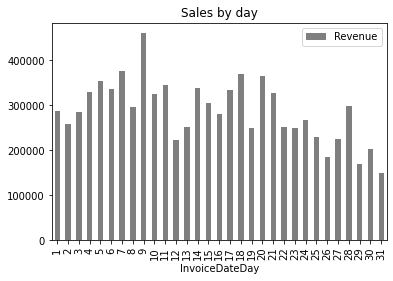

In [40]:
# można plot bo query to df, której indeksem jest InvoiceDateDay
query.plot(kind='bar', color='black', alpha=0.5, title='Sales by day')

In [54]:
# zamiast równości są dwie nierówności żeby dostać dzień 2010-12-09
# bo InvoiceDate składa się też z godziny. 
# Dlatego nie można retail['InvoiceDate'] == '2010-12-09'
day_9 = retail[(retail['InvoiceDate'] > '2010-12-09') &
               (retail['InvoiceDate'] < '2010-12-10')]
print(day_9)

      InvoiceNo StockCode  ... Revenue  InvoiceDateDay
19632    537879     22114  ...   47.40               9
19633    537879     22835  ...   37.20               9
19634    537879     85150  ...   15.30               9
19635    537879     85048  ...   31.80               9
19636    537879     21524  ...   15.90               9
...         ...       ...  ...     ...             ...
22518    538171     22271  ...    5.90               9
22519    538171     22750  ...    3.75               9
22520    538171     22751  ...    3.75               9
22521    538171     20970  ...    7.50               9
22522    538171     21931  ...    3.90               9

[1749 rows x 10 columns]


In [55]:
# godzina wzięta z daty wystawienia faktury
day_9['Hour'] = day_9['InvoiceDate'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
# suma zamówienia dla każdej godziny
query = day_9.groupby('Hour').aggregate({'Revenue': np.sum})
query

,Revenue
Hour,
8,213.30
9,2521.23
10,9500.50
11,2833.31
12,6125.01
13,5989.13
14,4666.98
15,2325.88
16,2164.01


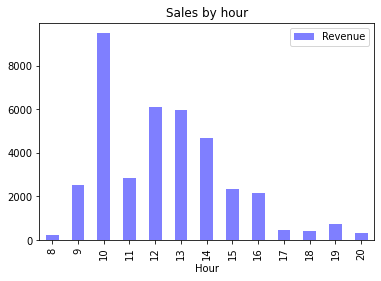

In [60]:
query.plot(kind='bar', color='blue', alpha=0.5, title='Sales by hour')

In [67]:
# %% top n rows (5 największych ilości sztuk w zamówieniu)
"""
SELECT * FROM retail
ORDER BY Quantity DESC
LIMIT 5;
"""
query = retail.nlargest(5, columns='Quantity')
print(query[["InvoiceNo", "Quantity"]])

print()
print("Inaczej (jak sugerowali w dokumentacji metody nlargest)")
moje_query = retail.sort_values("Quantity", ascending=False).head(5)
print(moje_query[["InvoiceNo", "Quantity"]])

       InvoiceNo  Quantity
540421    581483     80995
61619     541431     74215
502122    578841     12540
421632    573008      4800
206121    554868      4300

Inaczej (jak sugerowali w dokumentacji metody nlargest)
       InvoiceNo  Quantity
540421    581483     80995
61619     541431     74215
502122    578841     12540
421632    573008      4800
206121    554868      4300


In [68]:
# %% bottom n rows (5 najmniejszych ilości sztuk w zamówieniu)
"""
SELECT * FROM retail
ORDER BY Quantity
LIMIT 10;
"""
query = retail.nsmallest(5, columns='Quantity')
print(query[["InvoiceNo", "Quantity"]])

print()
print("Inaczej (jak sugerowali w dokumentacji metody nsmallest)")
moje_query = retail.sort_values("Quantity").head(5)
print(moje_query[["InvoiceNo", "Quantity"]])

    InvoiceNo  Quantity
113    536381         1
114    536381         1
115    536381         1
118    536381         1
120    536381         1

Inaczej (jak sugerowali w dokumentacji metody nsmallest)
       InvoiceNo  Quantity
213209    555524         1
171892    551471         1
171894    551471         1
93808     544312         1
171895    551471         1
